<h3> EDA Part 1 </h3>

* Part 1 will deal with the dataframes df_daily and df_hourly, covering 2011 and 2012. <br>
* These dataframes were cleaned and wrangled in "bike_analysis_data_wrangling_part_1.ipynb" <br>
* These dataframes include weather data, so we will use them to explore how the seasons and weather affect user behaver. 

In [29]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

Import the dataframes for the years 2011 – 2012

In [30]:
df_daily = pd.read_csv('cleaned_data/df_daily.csv')

In [31]:
df_hourly = pd.read_csv('cleaned_data/df_hourly.csv')

In [32]:
df_daily.head(2)

,Unnamed: 0,date,season,year,month,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month,calendar_week
0,0,2011-01-01,winter,2011,1,no,sat,no,misty,8.2,8.0,80.6,10.7,331,654,985,5.063729,5 to 15,2011-01,52
1,1,2011-01-02,winter,2011,1,no,sun,no,misty,9.1,7.3,69.6,16.7,131,670,801,3.837369,5 to 15,2011-01,52


In [33]:
df_hourly.head(2)

,Unnamed: 0,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
0,0,2011-01-01,winter,2011,1,0,no,sat,no,clear,3.3,3.0,81.0,0.0,3,13,16,0.355031,-5 to 5,2011-01
1,1,2011-01-01,winter,2011,1,1,no,sat,no,clear,2.3,2.0,80.0,0.0,8,32,40,-0.790695,-5 to 5,2011-01


In [34]:
df_daily['weather_sit'].value_counts(), df_hourly['weather_sit'].value_counts()

(clear      463
 misty      247
 bit wet     21
 Name: weather_sit, dtype: int64,
 clear       11413
 misty        4544
 bit wet      1419
 very wet        3
 Name: weather_sit, dtype: int64)

Ok, so there are no instances where "weather_sit" is "very wet" in the daily data. <br>
And only 3 instances in the hourly data.

Distributions of weather features in daily data.

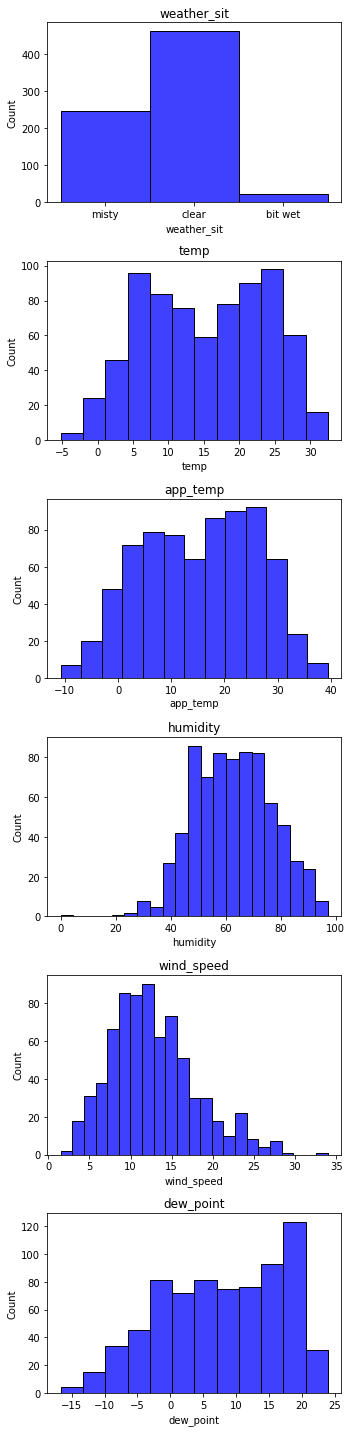

In [35]:
# Plot histograms of weather-related features for df_daily

weather_features = ['weather_sit', 'temp', 'app_temp', 'humidity', 'wind_speed', 'dew_point']

fig, axes = plt.subplots(len(weather_features),1, figsize = (5,20))
for i, feature in enumerate (weather_features):
    sns.histplot(ax = axes [i], data = df_daily, x = feature)
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

Distributions of weather features in hourly data

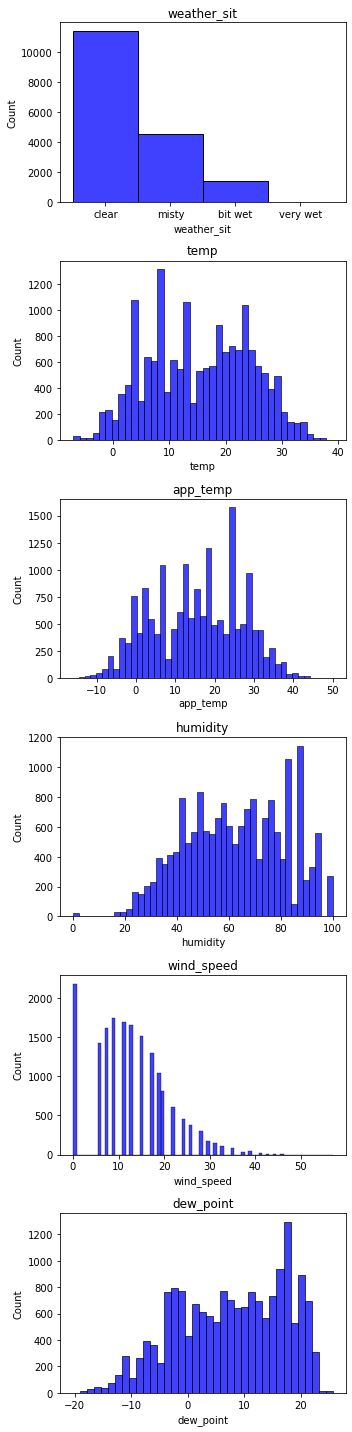

In [36]:
# Plot histograms of weather-related features for df_hourly

weather_features = ['weather_sit', 'temp', 'app_temp', 'humidity', 'wind_speed', 'dew_point']

fig, axes = plt.subplots(len(weather_features),1, figsize = (5,20))
for i, feature in enumerate (weather_features):
    sns.histplot(ax = axes [i], data = df_hourly, x = feature)
    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

<h3> Casual vs Registered Users per Month </h3>

Aggregate daily data to get mean number of "casual", "registered", and "total" users per month. <br>
Note, this is only for the years 2011 and 2012.

In [37]:
# mean no. users per month
users_per_month = df_daily.groupby('month').agg({'casual':'mean', 'registered':'mean', 'total':'mean'}).round().reindex(list(range(1,13)))

In [38]:
users_per_month

,casual,registered,total
month,,,
1,194.0,1982.0,2176.0
2,263.0,2393.0,2655.0
3,717.0,2975.0,3692.0
4,1013.0,3472.0,4485.0
5,1214.0,4136.0,5350.0
6,1232.0,4541.0,5772.0
7,1261.0,4303.0,5564.0
8,1162.0,4502.0,5664.0
9,1172.0,4594.0,5767.0


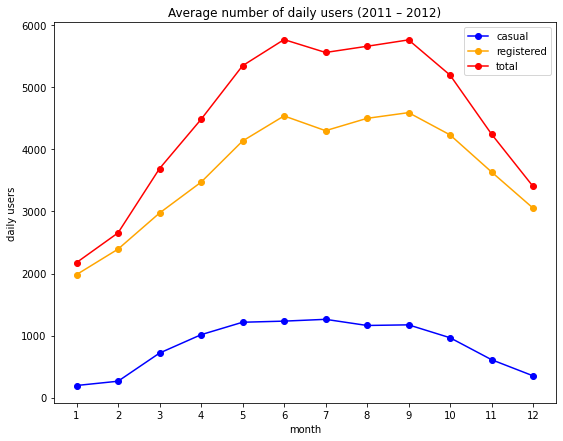

In [39]:
plt.figure(figsize = (9,7))
plt.title('Average number of daily users (2011 – 2012)')
plt.plot(users_per_month.index, users_per_month['casual'], label = 'casual', marker = 'o')
plt.plot(users_per_month.index, users_per_month['registered'], label = 'registered', marker = 'o')
plt.plot(users_per_month.index, users_per_month['total'], label = 'total', marker = 'o')
plt.xticks(ticks = users_per_month.index)
plt.xlabel ('month')
plt.ylabel ('daily users')
plt.legend()
plt.show()

<h3> Casual vs Registered Users per Day of Week </h3>

In [12]:
# users per day of week
users_per_DoW = df_daily.groupby('day_of_week').agg({'casual':'mean', 'registered':'mean', 'total':'mean'}).round()
users_per_DoW = users_per_DoW.reindex(['mon', 'tue', 'wed','thu', 'fri', 'sat', 'sun'])

In [13]:
users_per_DoW

,casual,registered,total
day_of_week,,,
mon,674.0,3664.0,4338.0
tue,556.0,3954.0,4511.0
wed,551.0,3997.0,4549.0
thu,591.0,4076.0,4667.0
fri,752.0,3938.0,4690.0
sat,1465.0,3085.0,4551.0
sun,1338.0,2891.0,4229.0


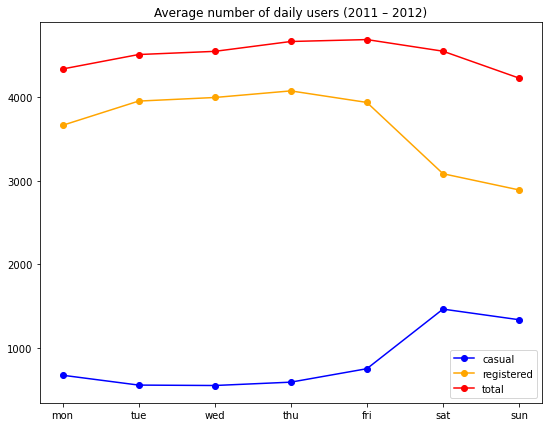

In [43]:
plt.figure(figsize = (9,7))
plt.title('Average number of daily users (2011 – 2012)')
plt.plot(users_per_DoW.index, users_per_DoW['casual'], label = 'casual', marker = 'o')
plt.plot(users_per_DoW.index, users_per_DoW['registered'], label = 'registered', marker = 'o')
plt.plot(users_per_DoW.index, users_per_DoW['total'], label = 'total', marker = 'o')
plt.legend()
plt.show()

This is interesting. At the weekend, the number of casual users goes up and the number of registered users goes down.

In [60]:
df_hourly.head(2)

,Unnamed: 0,date,season,year,month,hour,holiday,day_of_week,work_day,weather_sit,temp,app_temp,humidity,wind_speed,casual,registered,total,dew_point,app_temp_cat,year_month
0,0,2011-01-01,winter,2011,1,0,no,sat,no,clear,3.3,3.0,81.0,0.0,3,13,16,0.355031,-5 to 5,2011-01
1,1,2011-01-01,winter,2011,1,1,no,sat,no,clear,2.3,2.0,80.0,0.0,8,32,40,-0.790695,-5 to 5,2011-01


In [72]:
temp_hourly_agg = df_hourly.groupby(['hour']).mean()[['casual', 'registered', 'total']].reset_index()
temp_hourly_agg.head(2)

,hour,casual,registered,total
0,0,10.158402,43.739669,53.898072
1,1,6.504144,26.871547,33.375691


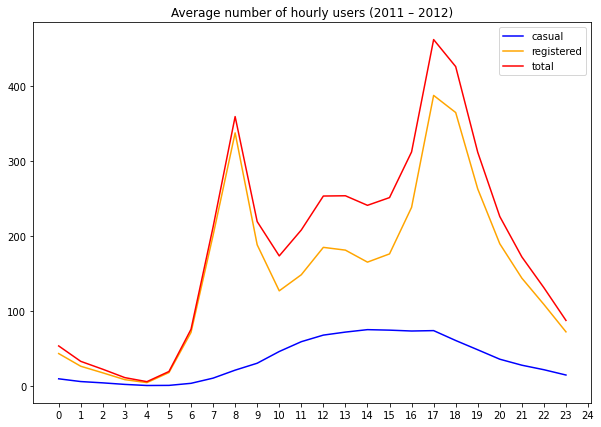

In [73]:
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(temp_hourly_agg['hour'], temp_hourly_agg['casual'], label = 'casual')
ax.plot(temp_hourly_agg['hour'], temp_hourly_agg['registered'], label = 'registered')
ax.plot(temp_hourly_agg['hour'], temp_hourly_agg['total'], label = 'total')
ax.set_xticks(ticks = list(range(25)))
plt.title('Average number of hourly users (2011 – 2012)')
plt.legend()
plt.show()


<h3> Average Total Users per Day of Week, Sorted by Season </h3>

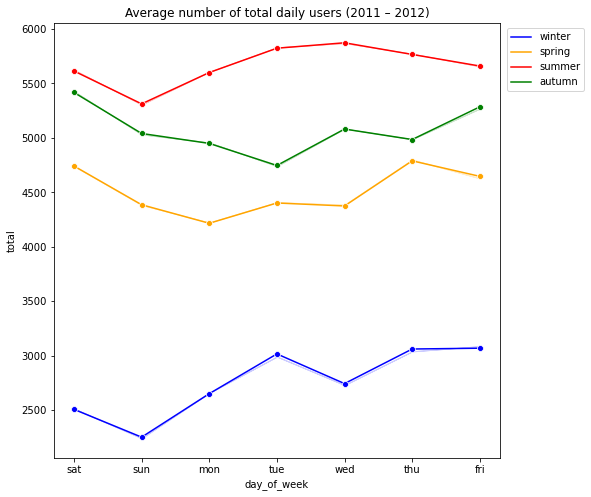

In [76]:


fig, ax = plt.subplots(figsize = (8,8))
colors = ['blue', 'orange', 'red', 'green']
sns.set_palette(sns.color_palette(colors))
sns.lineplot(ax = ax, x = 'day_of_week', y = 'total', data = df_daily, 
                hue = 'season', err_style = 'band', ci = False, marker = 'o',)

plt.legend(loc='upper right', bbox_to_anchor = (1.2,1))
plt.title('Average number of total daily users (2011 – 2012)')
plt.show()


#also, use "order" parameter

<h3> Average Total Users per Hour, Sorted by Season </h3>

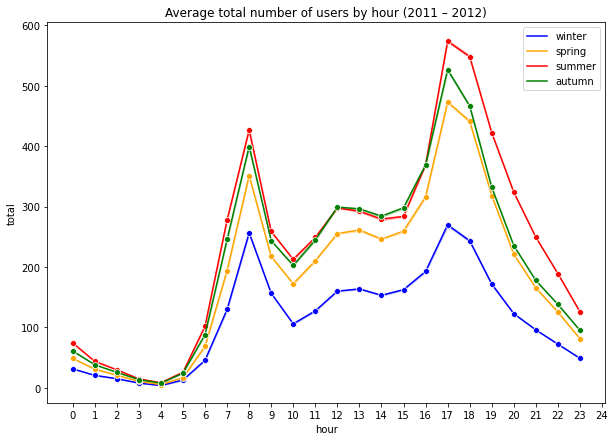

In [77]:
fig, ax = plt.subplots(figsize = (10,7))
colors = ['blue', 'orange', 'red', 'green']
sns.set_palette(sns.color_palette(colors))
sns.lineplot(x = 'hour', y = 'total', data = df_hourly, hue = 'season', err_style = 'band', ci = 10, marker = 'o')
plt.legend(loc = 'upper right', bbox_to_anchor = (1,1))
plt.title('Average total number of users by hour (2011 – 2012)')
plt.xticks (ticks = range(0,25))
plt.show()





Spring, summer, autumn relatively close together. And significant drop in winter. <br>
Evening peak lasts longer in summer (since evenings are longer / temps are higher) <br>
Number of users significantly lower in winter, but not by as much as I would've thought.

<h3> Casual vs Registered Users per Hour, Sorted by Season </h3>

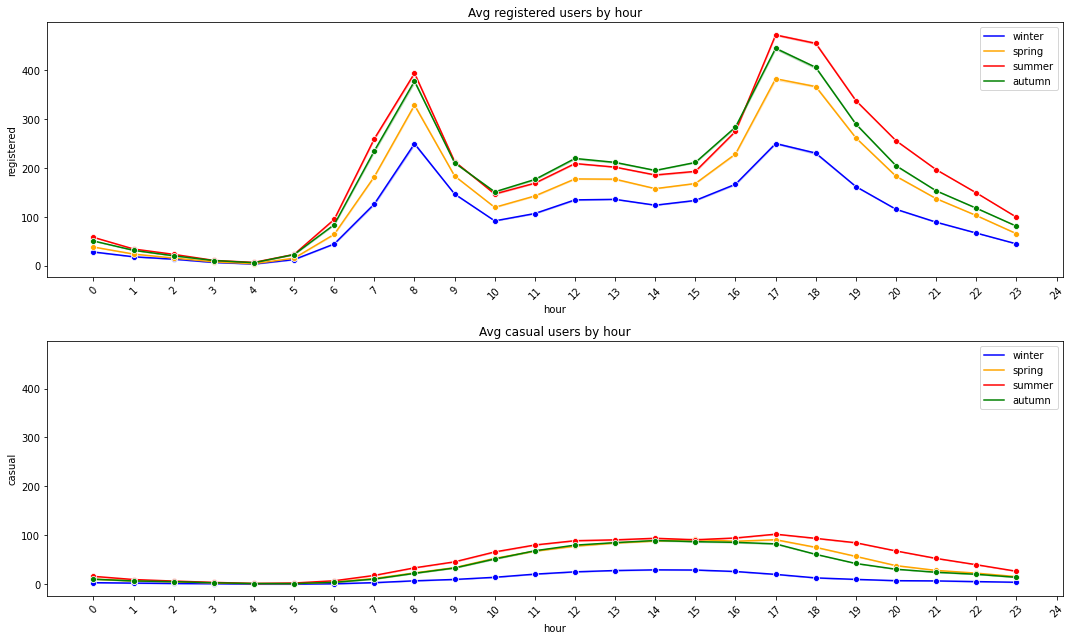

In [17]:


fig, axes = plt.subplots(2,1, figsize = (15, 9), sharey = True)
colors = ['blue', 'orange', 'red', 'green']
sns.set_palette(sns.color_palette(colors))

sns.lineplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'season', marker = 'o', ci = 10)
sns.lineplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'season', marker = 'o', ci = 10)

axes[0].legend(loc = 'upper right', bbox_to_anchor = (1,1))
axes[1].legend(loc = 'upper right', bbox_to_anchor = (1,1))


axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))


axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)

axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')

plt.tight_layout()
plt.show()

In winter, the drop in users is less severe for registered users than for casual users. <br>
For casual users, the number of users is quite consistent in spring, summer, autumn. 

<h3> Casual vs Registered Users per Hour, Sorted by apparent temperature category </h3>

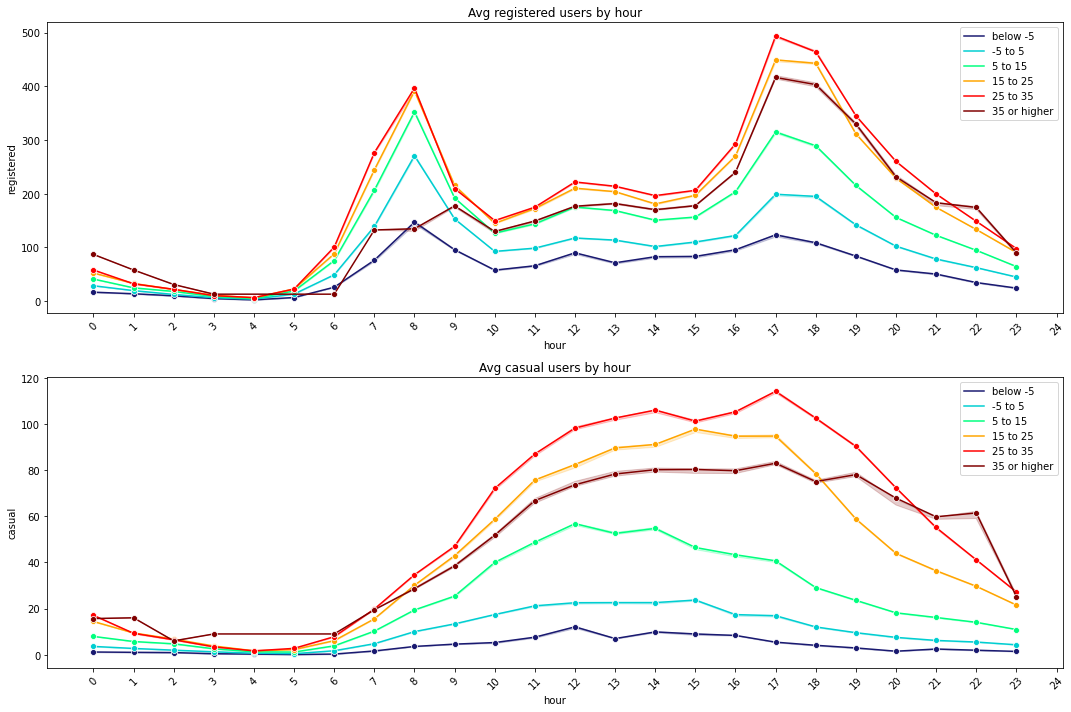

In [78]:
fig, axes = plt.subplots(2,1, figsize = (15, 10), sharey = False)

palette = {'below -5': "#191970", '-5 to 5': "#00CED1", '5 to 15': "#00FF7F",
           '15 to 25': "#FFA500", '25 to 35': "#FF0000", '35 or higher': "#800000"}

hue_order = ['below -5', '-5 to 5', '5 to 15', '15 to 25', '25 to 35', '35 or higher']

sns.lineplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'app_temp_cat', marker = 'o', ci = 10, palette = palette, hue_order = hue_order)
sns.lineplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'app_temp_cat', marker = 'o', ci = 10, palette = palette, hue_order = hue_order)


axes[0].legend(loc = 'upper right', bbox_to_anchor = (1,1))
axes[1].legend(loc = 'upper right', bbox_to_anchor = (1,1))

axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))


axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)


axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')


plt.tight_layout()
plt.show()

Interesting. <br>
Among registered users, when app_temp is 35 or above, way fewer people use the bikes TO work, but a lot still bike FROM work. <br>
They don't want to get sweaty when they arrive at work. <br>
But for (5 to 15), a large number of people bike TO work, but way fewer bike FROM work.

<h3> Total Users per Hour, Sorted by Free Day vs Work Day </h3>

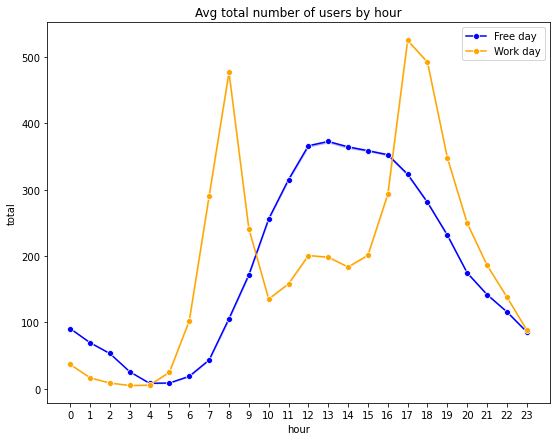

In [19]:
plt.figure(figsize = (9,7))
plt.title('Avg total number of users by hour')
lp = sns.lineplot(x = 'hour', y = 'total', hue = 'work_day', data = df_hourly, marker = 'o', ci = 10)
lp.legend(loc = 'upper right', bbox_to_anchor = (1,1))
lp.set_xticks(range(0,24))
lp.legend(labels = ['Free day', 'Work day'])
plt.show()

Interesting. When it's a work day, usage peaks at around 8 AM. When it's not a work day, usage peaks at around noon. <br>
Of course, we know there are way more registered users, so this graph is likely influenced mostly by registered users.

<h3> Registered vs Casual Users, Sorted by Work Day vs Free Day </h3>

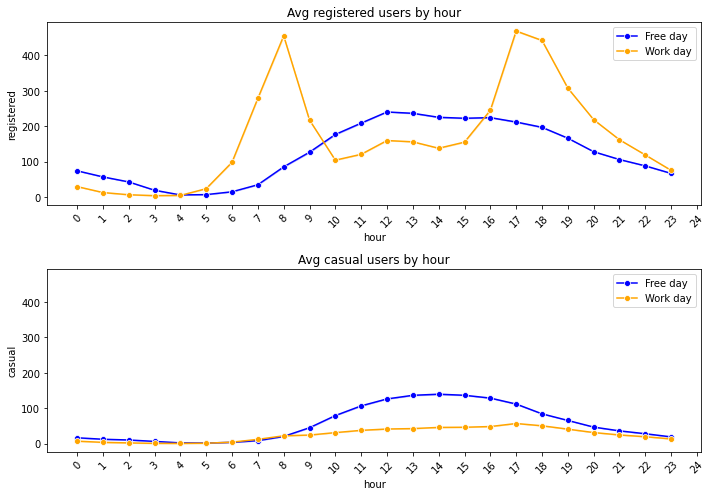

In [20]:
fig, axes = plt.subplots(2, 1, figsize = (10,7), sharey = True)

sns.lineplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'work_day', marker = 'o', ci = 10)
sns.lineplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'work_day', marker = 'o', ci = 10)

axes[0].legend(loc = 'upper right', bbox_to_anchor = (1,1), labels = ['Free day', 'Work day'])
axes[1].legend(loc = 'upper right', bbox_to_anchor = (1,1), labels = ['Free day', 'Work day'])

axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))

axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)

axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')

plt.tight_layout()
plt.show()


plt.show()

Registered users: <br>
Work days: sharper peaks during commuting times <br>
Free days: gentler, wider peak (from late morning to late afternoon) <br>

Casual users: <br>
Work day: lower peak at around 5 pm <br>
Free day: higher peak in the early afternoon <br>

<h3> Total number of users per hour, sorted by temperature </h3>

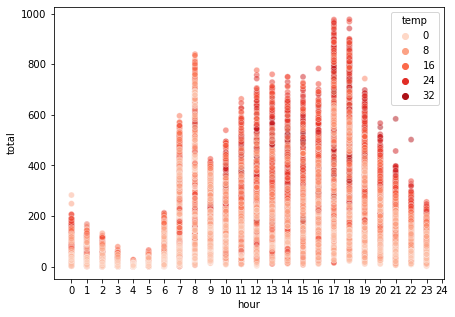

In [21]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'hour', y = 'total', data = df_hourly, hue = 'temp', palette = 'Reds', alpha = 0.5)
plt.xticks(ticks = range(0,25), labels = range(0,25))

plt.show()

<h3> Registered vs Casual Users by Hour, sorted by temperature </h3>

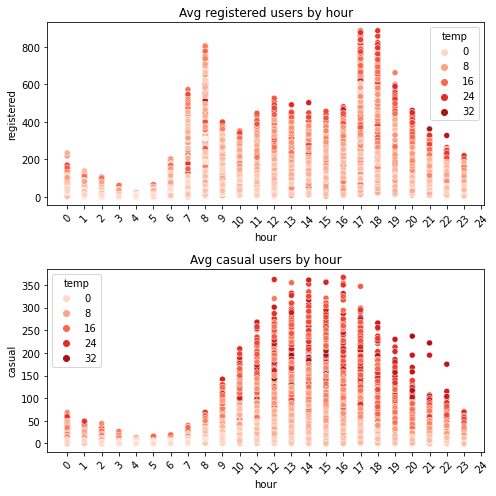

In [22]:
fig, axes = plt.subplots(2, 1, figsize = (7,7))

sns.scatterplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'temp', marker = 'o', palette = 'Reds')
sns.scatterplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'temp', marker = 'o', palette = 'Reds')


axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))


axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)


axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')


plt.tight_layout()
plt.show()


plt.show()

Casual users are more temperature dependent. <br>
Intuitive, since casual users will decide to rent on a spontaneous basis – when the weawther is nice.

<h3> Total number of users by hour, sorted by weather situation </h3>

<AxesSubplot:xlabel='hour', ylabel='total'>

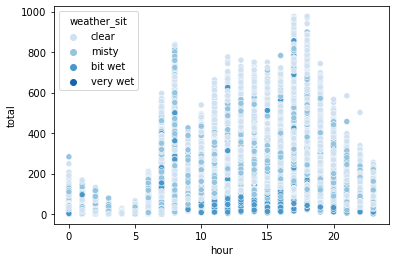

In [23]:
sns.scatterplot(x = 'hour', y = 'total', data = df_hourly, hue = 'weather_sit', palette = 'Blues')

Intuitive. Fewer users in bad weather. <br>
Though at around the 8 AM mark, there are still some users even in wet weather. <br> 
I suspect these are mostly registered users who need to commute. 

<h3> Registered vs Casual Users by Hour, sorted by weather situation </h3>

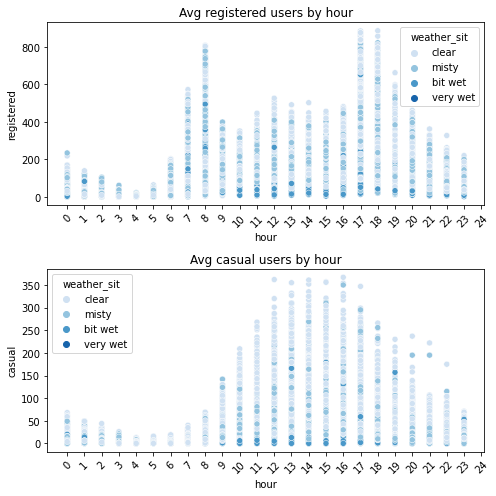

In [24]:
fig, axes = plt.subplots(2, 1, figsize = (7,7))

sns.scatterplot(ax = axes[0], x = 'hour', y = 'registered', data = df_hourly, hue = 'weather_sit', marker = 'o', palette = 'Blues')
sns.scatterplot(ax = axes[1], x = 'hour', y = 'casual', data = df_hourly, hue = 'weather_sit', marker = 'o', palette = 'Blues')


axes[0].set_xticks(ticks = range(0,25))
axes[1].set_xticks(ticks = range(0,25))


axes[0].set_xticklabels(labels = range(0,25), rotation = 45)
axes[1].set_xticklabels(labels = range(0,25), rotation = 45)


axes [0].set_title('Avg registered users by hour')
axes [1].set_title('Avg casual users by hour')


plt.tight_layout()
plt.show()


plt.show()